In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
icu_days = pd.read_csv('MIMIC2csv/icustay_days.csv')
re_ind = icu_days.set_index(['icustay_id','subject_id'])
icu_subject = list(re_ind.index)

In [3]:
def removeDuplicates(lst):
      
    return list(set([i for i in lst]))

### Target column 

In [4]:
icu_subject = removeDuplicates(icu_subject)

target_ICUstay = pd.DataFrame()
for i in range(0,len(icu_subject)):
    x = (re_ind.loc[icu_subject[i]]) 
    target_ICUstay = target_ICUstay.append(x[(x.seq == x.seq.max())])
    
target_ICUstay = target_ICUstay.drop(labels= ['begintime','endtime','first_day_flg','last_day_flg'],axis=1)
#target_ICUstay.head()

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  """
/opt/anaconda3/envs/ML_env/lib/python3.6/site-packag

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='seq', ylabel='Density'>

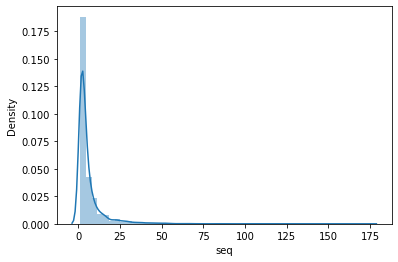

In [9]:
sns.distplot(target_ICUstay.seq)

### **Feature 1.** Number of Chart items 

In [10]:
chart_dur = pd.read_csv('MIMIC2csv/a_chartdurations.csv')

chart_dur = chart_dur[chart_dur.icustay_id.notna()]
chart_dur.icustay_id = chart_dur.icustay_id.astype(np.int64)

re_ind_chart_dur = chart_dur.set_index(['icustay_id','subject_id'])
chart_subject = list(re_ind_chart_dur.index)
chart_subject = removeDuplicates(chart_subject)

no_chart_feature = pd.DataFrame(columns = ['icustay_id','subject_id','no_chart_items'])

for i in range(0,len(chart_subject)):
    no_chart_feature = no_chart_feature.append({'icustay_id': chart_subject[i][0], 'subject_id': chart_subject[i][1], 'no_chart_items': len(re_ind_chart_dur.loc[chart_subject[i]])}, ignore_index=True)
    
no_chart_feature = no_chart_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:13: PerformanceWarning: indexing past lexsort depth may impact performance.
  del sys.path[0]


### **Feature 2.** IO duration

In [11]:
io_dur = pd.read_csv('MIMIC2csv/a_iodurations.csv')

io_dur = io_dur[io_dur.icustay_id.notna()]
io_dur.icustay_id = io_dur.icustay_id.astype(np.int64)

re_ind_io_dur = io_dur.set_index(['icustay_id','subject_id'])

io_subject = list(re_ind_io_dur.index)
io_subject = removeDuplicates(io_subject)

io_dur_feature = pd.DataFrame(columns = ['icustay_id','subject_id','io_dur_min'])

for i in range(0,len(io_subject)):
    io_dur_feature = io_dur_feature.append({'icustay_id': io_subject[i][0], 'subject_id': io_subject[i][1], 'io_dur_min': re_ind_io_dur.loc[io_subject[i]].duration.sum()}, ignore_index=True)
    
io_dur_feature = io_dur_feature.astype(np.int64)

io_dur_feature = io_dur_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  


### **Feature 3.** Medication duration

In [12]:
med_dur = pd.read_csv('MIMIC2csv/a_meddurations.csv')

med_dur = med_dur[med_dur.icustay_id.notna()]
med_dur.icustay_id = med_dur.icustay_id.astype(np.int64)

re_ind_med_dur = med_dur.set_index(['icustay_id','subject_id'])

med_subject = list(re_ind_med_dur.index)
med_subject = removeDuplicates(med_subject)

med_dur_feature = pd.DataFrame(columns = ['icustay_id','subject_id','med_dur_min'])

for i in range(0,len(med_subject)):
    med_dur_feature = med_dur_feature.append({'icustay_id': med_subject[i][0], 'subject_id': med_subject[i][1], 'med_dur_min': re_ind_med_dur.loc[med_subject[i]].duration.sum()}, ignore_index=True)
    
med_dur_feature = med_dur_feature.astype(np.int64)
med_dur_feature = med_dur_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  


### **Feature 4.** Sum of medication volume

In [13]:
additives = pd.read_csv('MIMIC2csv/additives.csv')

additives = additives[additives.icustay_id.notna()]
additives.icustay_id = additives.icustay_id.astype(np.int64)

re_ind_additives = additives.set_index(['icustay_id','subject_id'])

additives_subject = list(re_ind_additives.index)
additives_subject = removeDuplicates(additives_subject)

add_dose_amt_feature = pd.DataFrame(columns = ['icustay_id','subject_id','total_amt'])

for i in range(0,len(additives_subject)):
    add_dose_amt_feature = add_dose_amt_feature.append({'icustay_id': additives_subject[i][0], 'subject_id': additives_subject[i][1], 'total_amt': re_ind_additives.loc[additives_subject[i]].amount.sum()}, ignore_index=True)
    
add_dose_amt_feature = add_dose_amt_feature.astype(np.int64)
add_dose_amt_feature = add_dose_amt_feature.set_index(['icustay_id','subject_id'])

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  


In [14]:
demographic_det = pd.read_csv('MIMIC2csv/demographic_detail.csv')

demographic_det = demographic_det.drop_duplicates(subset='subject_id')

demographic_det = demographic_det.drop(['hadm_id','marital_status_itemid','ethnicity_itemid','overall_payor_group_itemid','religion_itemid','admission_type_itemid','admission_type_descr','admission_source_itemid','admission_source_descr'],axis=1)

In [15]:
drg_events = pd.read_csv('MIMIC2csv/drgevents.csv')

In [16]:
icu_stay_det = pd.read_csv('MIMIC2csv/icustay_detail.csv')

icu_stay_det = icu_stay_det.drop(['dob','dod','icustay_seq','expire_flg','subject_icustay_total_num','subject_icustay_seq','hospital_total_num','hospital_seq','hospital_first_flg','hospital_last_flg','hospital_admit_dt','hospital_disch_dt','hospital_los','icustay_age_group','hospital_expire_flg','icustay_total_num','icustay_first_flg','icustay_last_flg','icustay_los','icustay_intime','icustay_outtime','icustay_expire_flg','icustay_last_careunit','icustay_first_service','icustay_last_service','weight_min','weight_max','sapsi_min','sapsi_max','sofa_min','sofa_max','matched_waveforms_num'],axis=1)

### **Feature 5.** NLTK diagnosis feature

In [17]:
icd9 = pd.read_csv('MIMIC2csv/icd9.csv')

re_ind_icd9 = icd9.set_index(['subject_id','hadm_id'])
re_ind_icd9 = re_ind_icd9.drop('code',axis=1)

re_ind_icd9.head()

# World Health Organization's Ninth Revision, International Classification 
# of Diseases (ICD-9).

sequence  \
subject_id hadm_id             
56         28766           1   
           28766           2   
           28766           3   
           28766           4   
           28766           5   

                                                          description  
subject_id hadm_id                                                     
56         28766    SECONDARY MALIGNANT NEOPLASM OF BRAIN AND SPIN...  
           28766    MALIGNANT NEOPLASM OF OTHER PARTS OF BRONCHUS ...  
           28766    CHRONIC OR UNSPECIFIED GASTRIC ULCER WITH HEMO...  
           28766                    HYPOSMOLALITY AND/OR HYPONATREMIA  
           28766                 CONGESTIVE HEART FAILURE UNSPECIFIED

In [ ]:
ic

In [64]:
%%time
icd9_diag = pd.DataFrame(columns = ['subject_id','hadm_id','diagnosis'])
for i in range(0,len(icd9_subject)):
    sample = (re_ind_icd9.loc[icd9_subject[i]]).reset_index()
    diagnosis = []
    for j in range(0,len(sample)):
        if type(sample.loc[j].description) == str:
            y = sample.loc[j].description.lower().split()
            diagnosis = diagnosis + y
    icd9_diag = icd9_diag.append({'subject_id':icd9_subject[i][0], 'hadm_id': icd9_subject[i][1],'diagnosis':diagnosis},ignore_index=True)

/opt/anaconda3/envs/ML_env/lib/python3.6/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 49.5 s, sys: 252 ms, total: 49.8 s
Wall time: 50.2 s


In [18]:
icd9_diag

NameError: name 'icd9_diag' is not defined

In [30]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madihahhaque/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
full_list = []  # list containing all words of all texts
for elmnt in re_ind_icd9['description']:  # loop over lists in df
    full_list += elmnt  # append elements of lists to full list

val_counts = pd.Series(full_list).value_counts()  # make temporary Series to count['Text']:  # loop over lists in df
full_list += elmnt  # append elements of lists to full list
    
stop_words = stopwords.words('english')
stop_words.append('without')
stop_words.append('due')
stop_words.append('specified')
stop_words.append('unspecified')
stop_words.append('essential')
stop_words.append('nos')
stop_words.append('native')
stop_words.append('elsewhere')
stop_words.append('type')

filtered = [w for w in full_list if not w.lower() in stop_words]
    
allWordDist = nltk.FreqDist(w.lower() for w in filtered)
mostCommon= allWordDist.most_common(20)
    
commonWords = [] 
for i in range(0,len(mostCommon)):
    commonWords.append(mostCommon[i][0])

TypeError: 'float' object is not iterable

In [20]:
def diagWordCount(x):
    wordcount = 0
    lst = []
    for word in x:
        if word in commonWords:
            wordcount += 1
    lst.append(wordcount)
    return lst

In [21]:
diagnosis_countList = icd9_diag.diagnosis.map(diagWordCount)

NameError: name 'icd9_diag' is not defined

In [22]:
for i in range(0,len(diagnosis_countList)):
    diagnosis_countList[i] = diagnosis_countList[i][0]

NameError: name 'diagnosis_countList' is not defined

In [23]:
diagnosis_countList

NameError: name 'diagnosis_countList' is not defined

In [24]:
icd9_diag['diagnosis_count'] = diagnosis_countList

NameError: name 'diagnosis_countList' is not defined

In [25]:
icd9_diag.diagnosis_count = icd9_diag.diagnosis_count.astype(np.int64)
icd9_diag.subject_id = icd9_diag.subject_id.astype(np.int64)
icd9_diag.hadm_id = icd9_diag.hadm_id.astype(np.int64)
icd9_diag = icd9_diag.drop('diagnosis',axis=1)

NameError: name 'icd9_diag' is not defined

In [26]:
icd9_diag.dtypes

NameError: name 'icd9_diag' is not defined

In [ ]:
icd9_diag

# ***MERGE*** (final_df_1.csv)

In [ ]:
print('shape of icu details:',icu_stay_det.shape)
print('shape of target df:',target_ICUstay.shape)

In [ ]:
merge_target_detail = pd.merge(icu_stay_det,target_ICUstay,left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg = pd.merge(merge_target_detail,drg_events,how='left',left_on ='hadm_id',right_on = 'hadm_id')
merge_target_detail_drg_demo = pd.merge(merge_target_detail_drg,demographic_det,how ='left',left_on='subject_id_x',right_on= 'subject_id')
merge_target_detail_drg_demo_med = pd.merge(merge_target_detail_drg_demo,med_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose = pd.merge(merge_target_detail_drg_demo_med,add_dose_amt_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose_io = pd.merge(merge_target_detail_drg_demo_med_dose,io_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

final_df = pd.merge(merge_target_detail_drg_demo_med_dose_io,no_chart_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

### Data visuals for features

In [ ]:
sns.boxplot(final_df.height)

In [ ]:
sns.boxplot(final_df.icustay_admit_age)

In [ ]:
sns.boxplot(final_df.weight_first)

In [ ]:
final_df = final_df[final_df.height!=final_df.height.max()]
final_df = final_df[final_df.weight_first!=final_df.weight_first.max()]
final_df = final_df[final_df.icustay_admit_age!=final_df.icustay_admit_age.min()]

final_df = final_df.drop(['subject_id','icustay_id','subject_id_x','hadm_id','subject_id_y','itemid','no_chart_items'],axis=1)

In [ ]:
final_df

In [ ]:
final_df = final_df.reset_index(drop=True)

In [ ]:
final_df.dtypes

In [ ]:
final_df

In [ ]:
final_df.describe()

In [ ]:
final_df.corr()

# ***Merge*** final_df_2

In [ ]:
merge_target_detail = pd.merge(icu_stay_det,target_ICUstay,left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg = pd.merge(merge_target_detail,drg_events,how='left',left_on ='hadm_id',right_on = 'hadm_id')
merge_target_detail_drg_demo = pd.merge(merge_target_detail_drg,demographic_det,how ='left',left_on='subject_id_x',right_on= 'subject_id')
merge_target_detail_drg_demo_med = pd.merge(merge_target_detail_drg_demo,med_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose = pd.merge(merge_target_detail_drg_demo_med,add_dose_amt_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])
merge_target_detail_drg_demo_med_dose_io = pd.merge(merge_target_detail_drg_demo_med_dose,io_dur_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

final_df = pd.merge(merge_target_detail_drg_demo_med_dose_io,no_chart_feature,how='left',left_on = ['subject_id','icustay_id'],right_on =['subject_id','icustay_id'])

In [ ]:
final_df.shape

In [ ]:
final_df_2 = pd.merge(final_df,icd9_diag,how='left',left_on = ['subject_id','hadm_id'],right_on = ['subject_id','hadm_id'])

In [ ]:
final_df_2

In [ ]:
final_df_2.columns

In [ ]:
final_df_2 = final_df_2.drop(['icustay_id','subject_id_x','hadm_id','subject_id_y','itemid','subject_id','no_chart_items'],axis=1)

In [ ]:
final_df_2.to_csv('train-test-2/df-2.csv',index=False)

In [ ]:
sns.jointplot(data=final_df_2, x="cost_weight", y="seq", hue="gender")